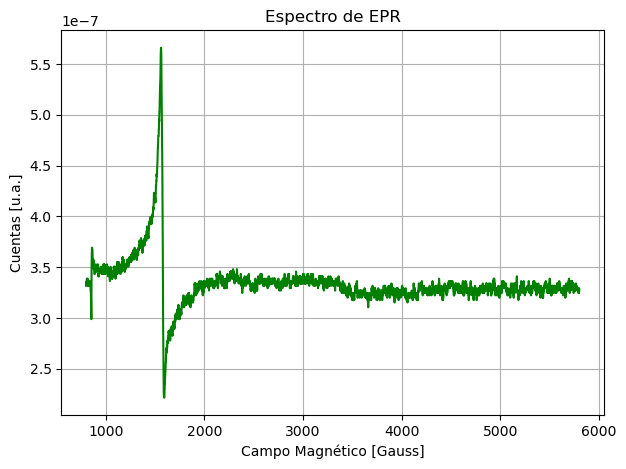

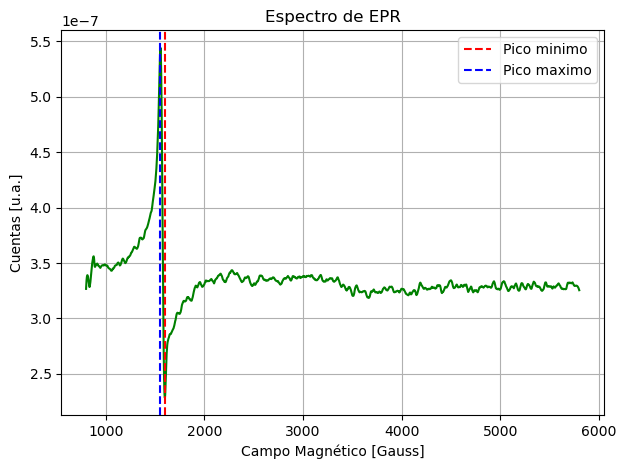

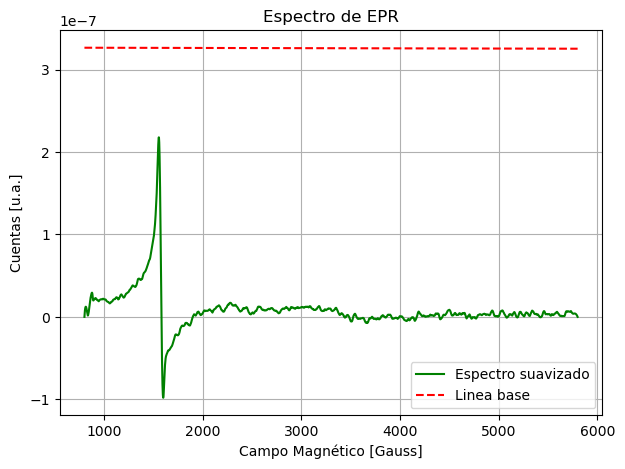

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('Ni-80K-16-04.dat', usecols=(2,3))
Dt=Dt[:4096]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min

plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave-lineabase, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()

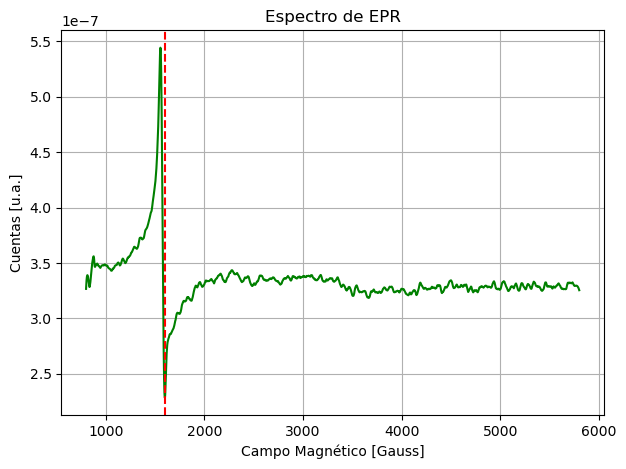

In [28]:
from scipy.signal import argrelextrema

WW=argrelextrema(Intsuave, np.greater)[0]
WWW=argrelextrema(Intsuave, np.less)[0]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
#for i in range(0,len(WW)-1):
 #   plt.axvline(campo_mag[WW[i]],color='blue',linestyle='--',label='Pico maximo')
#plt.legend()
plt.grid()
plt.show()

In [37]:
I=3/2
Lines=2*I+1
Lines

4.0

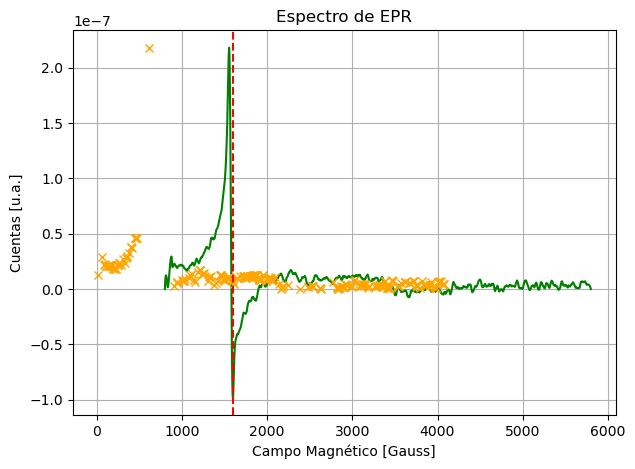

In [43]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(Intsuave-lineabase, height=0)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave-lineabase, color = 'green',label='Espectro suavizado')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.plot(peaks, (Intsuave-lineabase)[peaks], "x", color='orange')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
#for i in range(0,len(WW)-1):
 #   plt.axvline(campo_mag[WW[i]],color='blue',linestyle='--',label='Pico maximo')
#plt.legend()
plt.grid()
plt.show()
